<a href="https://colab.research.google.com/github/reshminambiar/Chennai-House-Price-prediction/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train-chennai-sale.csv')

In [ ]:
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

In [ ]:
df.info() # Here we can see N_BEDROOM,N_BATHROOM and QS_OVERALL fields have missing values.Also DATE_SALE and DATE_BUILD column datatypes need to be changed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
df.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7109.000000    7109.000000  7108.000000  7104.000000  7109.000000   
mean   1382.073006      99.603179     1.637029     1.213260     3.688704   
std     457.410902      57.403110     0.802902     0.409639     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7109.000000  7109.000000  7109.000000  7061.000000    7109.000000   
mean      3.517471     3.507244     3.485300     3.503254  376938.330708   
std       0.891972     0.897834     0.887266     0.527223  143070.662010   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.130000  272406.000000   
50%       3.500000     3.500000     3.500000     3.500000  349486.000000   
75%       4.300000     4.300000     4.300000     3.890000  451562.000000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              COMMIS   SALES_PRICE  
count    7109.000000  7.109000e+03  
mean   141005.726544  1.089491e+07  
std     78768.093718  3.768603e+06  
min      5055.000000  2.156875e+06  
25%     84219.000000  8.272100e+06  
50%    127628.000000  1.033505e+07  
75%    184506.000000  1.299390e+07  
max    495405.000000  2.366734e+07

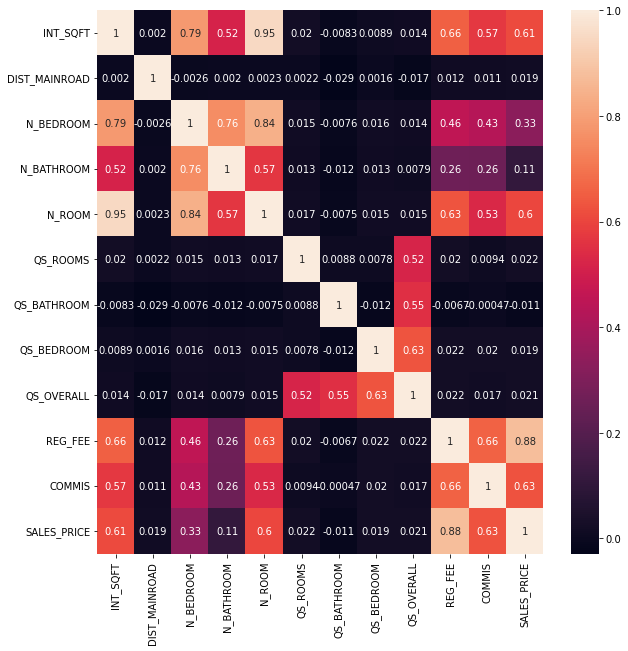

In [ ]:
# This heatmap is for reference. we will need it at many points later
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

N_ROOM and INT_SQFT , N_ROOM and N_BEDROOM are two highly correlated features.

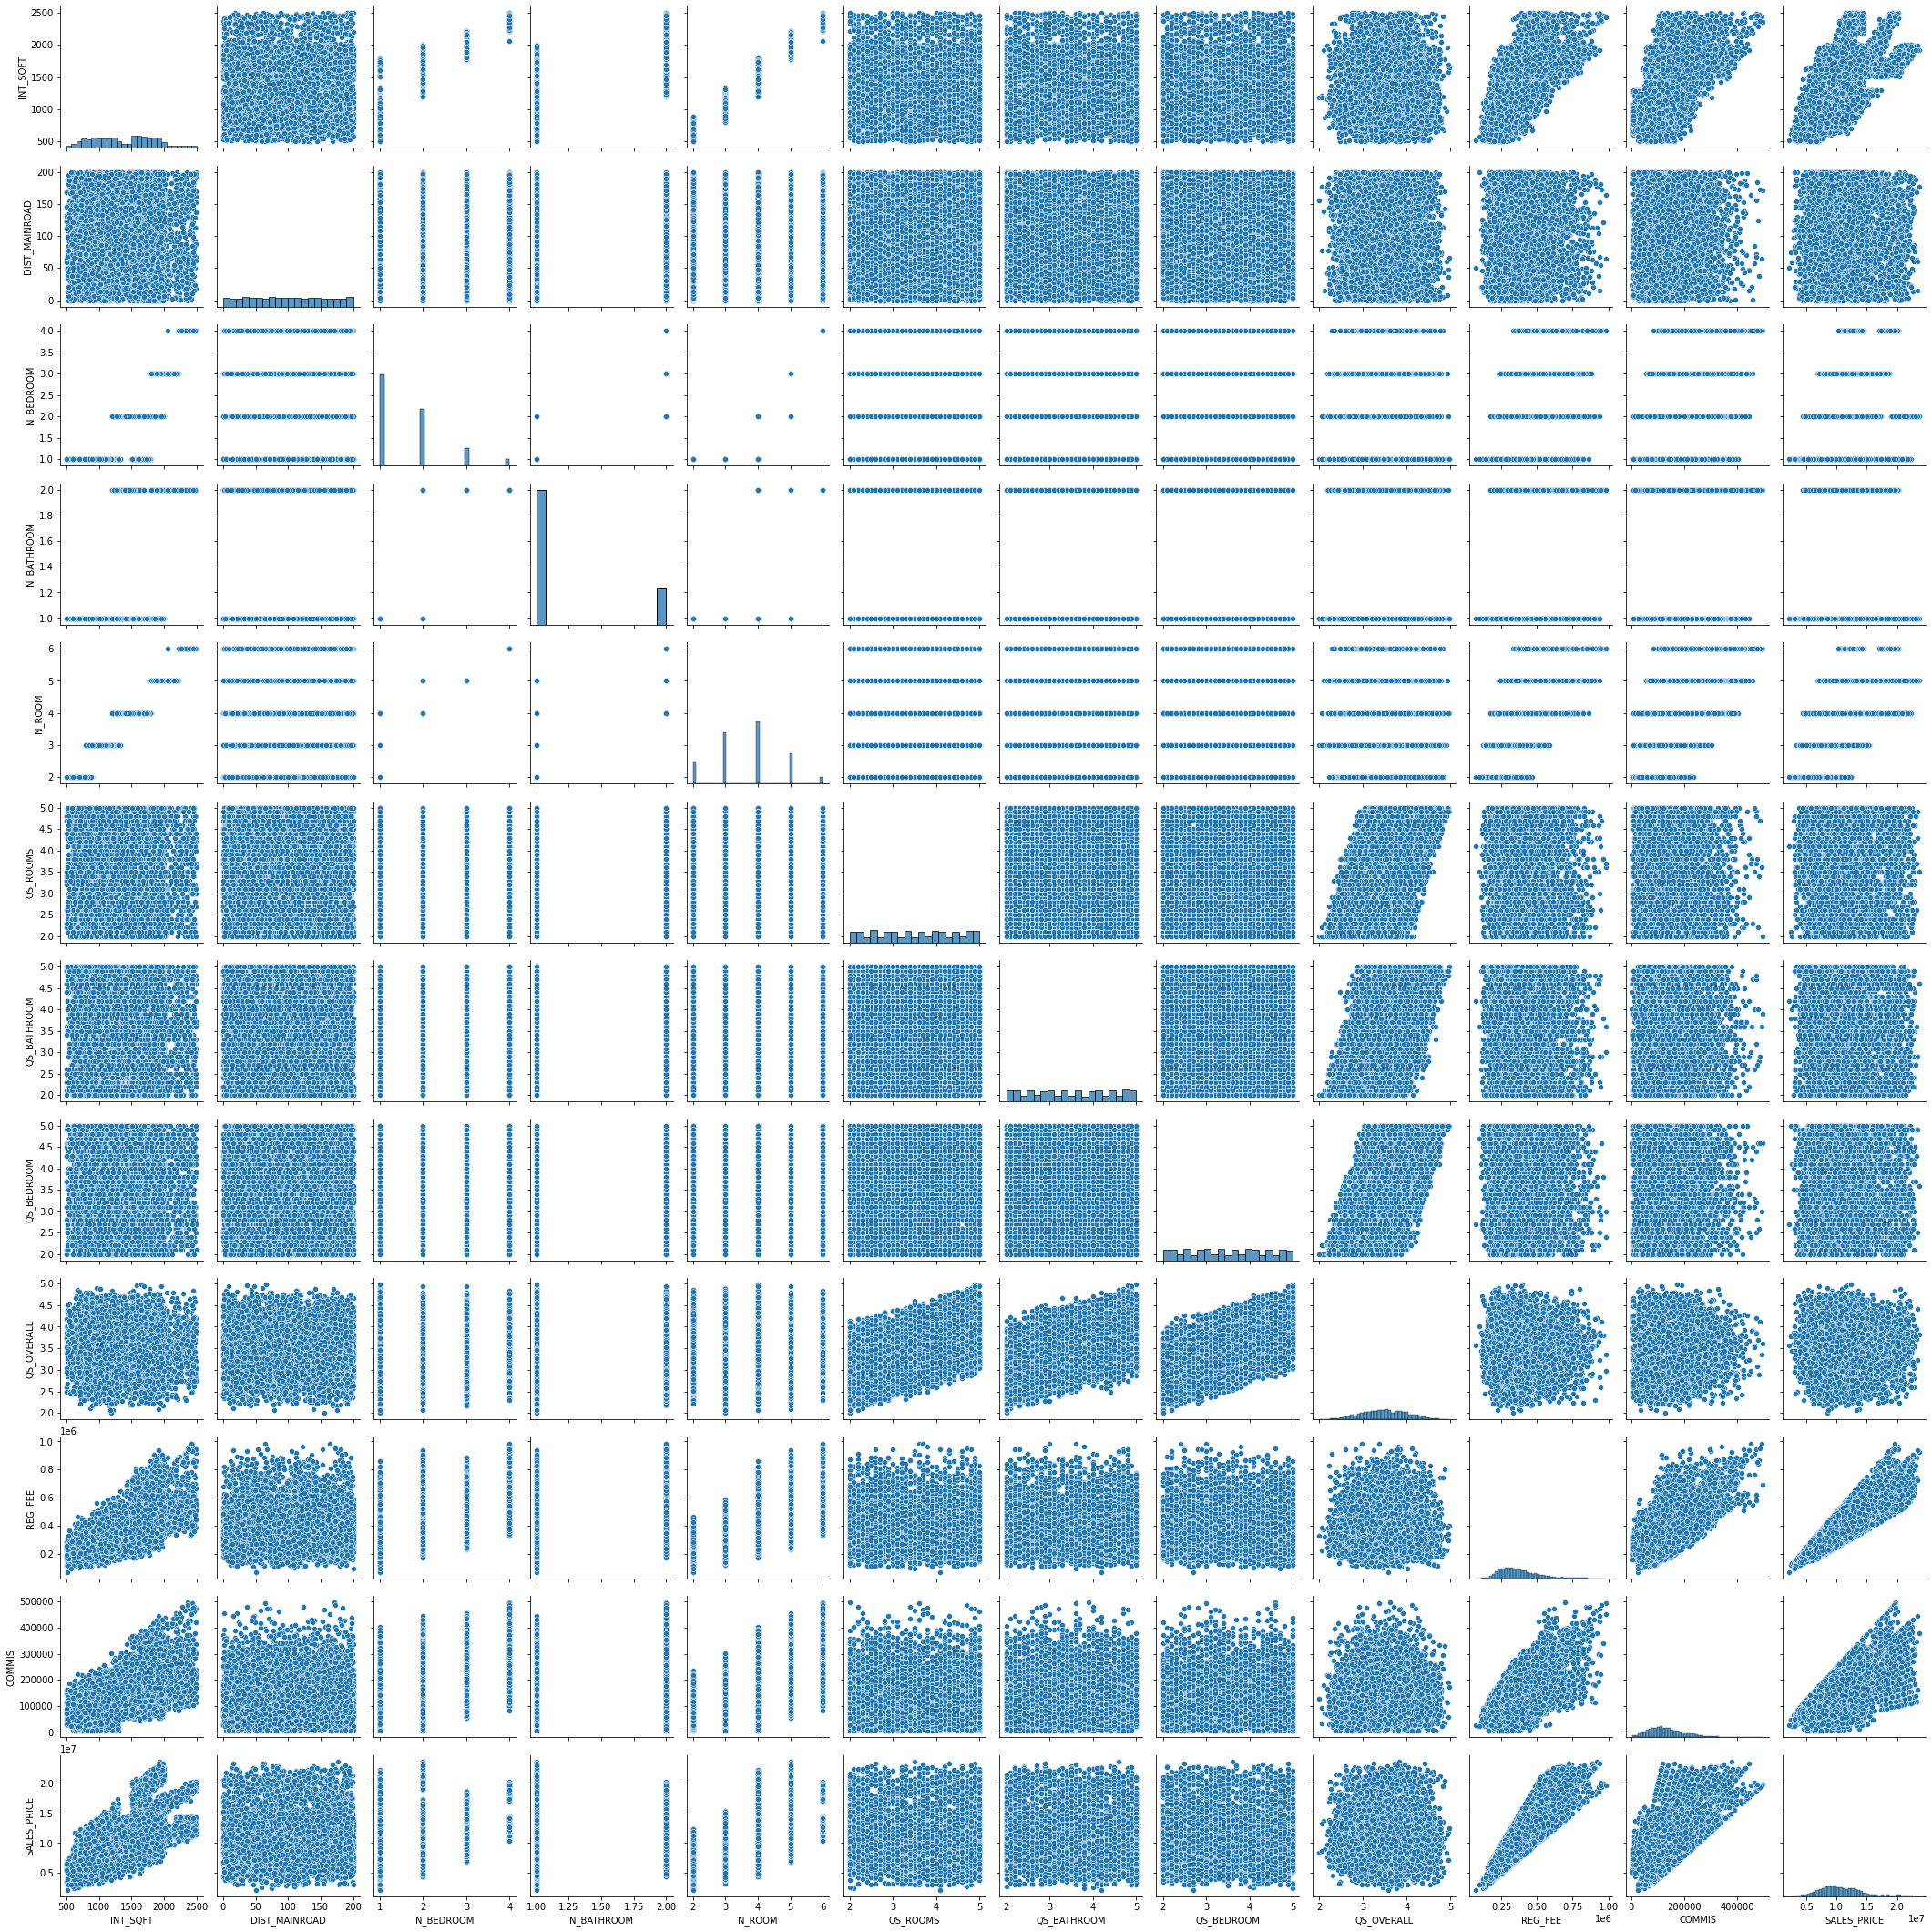

In [ ]:
sns.pairplot(df)

##Handling missing values and checking for duplicate rows

In [ ]:
df[df.N_BEDROOM.isna()] #A single value of N_BEDROOM is missing.

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
4060  P01066  Anna Nagar      1556  16-01-2013            181        NaN   

      N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL     STREET  \
4060         1.0       4  Partiall         No  ...       NoSewr   No Access   

     MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  \
4060     RM      4.8         2.7         2.0       3.155   313136  107978   

      SALES_PRICE  
4060     10797790  

[1 rows x 22 columns]

From the heatmap, we can see that N_BEDROOM and N_ROOM are highly correlated. So I would like to impute the missing value with the mode of N_BEDROOM where 
N_ROOM = 4

In [ ]:
df['N_BEDROOM'].unique()

array([ 1.,  2.,  3.,  4., nan])

In [ ]:
df[df.N_ROOM == 4]['N_BEDROOM'].mode()

0    2.0
dtype: float64

In [ ]:
df['N_BEDROOM'].fillna(value=2.0, inplace=True)

In [ ]:
df['N_BEDROOM'].unique() #All values are successfully replaced

array([1., 2., 3., 4.])

In [ ]:
df[df.N_BATHROOM.isna()] #5 values of N_BATHROOM are missing.

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
70    P05304  Anna Nagar      1589  22-03-2010             39        1.0   
5087  P01333    Chrompet      1016  02-08-2012            105        1.0   
6134  P01332    Chormpet       916  02-08-2012            173        1.0   
6371  P01189    Chrompet      1035  06-11-2012             90        1.0   
6535  P09189  Anna Nagar      1864  05-03-2007            184        2.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
70           NaN       4      Partial         No  ...        AllPub   
5087         NaN       3     AbNormal        Yes  ...       NoSewr    
6134         NaN       3  Normal Sale        Yes  ...           ELO   
6371         NaN       3      Partial         No  ...        NoSeWa   
6535         NaN       5       Family        Yes  ...       NoSewr    

         STREET MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
70       Gravel     RL      2.1         2.5         4.5        3.16   451857   
5087     Gravel     RM      3.2         4.2         2.0        3.24   330086   
6134      Paved     RL      3.4         3.5         3.0         NaN   265423   
6371  No Access     RM      2.3         3.5         3.2        3.05   223403   
6535      Paved     RM      3.3         3.7         4.7        3.96   575606   

      COMMIS  SALES_PRICE  
70     85486     12212350  
5087  106479     10647920  
6134   44237      8847420  
6371   24823      8274200  
6535  124455     15556920  

[5 rows x 22 columns]

From the heatmap, we can see that N_BEDROOM and N_BATHROOM are highly correlated. So I would like to impute the missing value with the mode of N_BATHROOM where N_BEDROOM = 1

In [ ]:
df[df.N_BEDROOM == 1]['N_BATHROOM'].mode()

0    1.0
dtype: float64

In [ ]:
df['N_BATHROOM'].unique()

array([ 1.,  2., nan])

In [ ]:
df['N_BATHROOM'].fillna(value=1.0, inplace=True)

In [ ]:
df['N_BATHROOM'].unique() #All values are successfully replaced

array([1., 2.])

In [ ]:
df[df.QS_OVERALL.isna()] #we have 48 missing values.But for these rows all other values are present.So we will try not to remove them.

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
15    P06328   Velachery      1868  12-09-2009            148        3.0   
46    P09483     T Nagar      1882  18-11-2006            189        2.0   
86    P00545    Chrompet      1085  19-01-2014            149        1.0   
111   P06768       Adyar      1034  30-05-2009             73        1.0   
134   P00089     T Nagar      1942  20-12-2014             10        2.0   
143   P06226  Karapakkam      1430  02-10-2009             17        2.0   
161   P06964   Velachery      1824  03-04-2009            187        3.0   
186   P08752       Adyar       738  02-09-2007             69        1.0   
208   P03292  Karapakkam      1578  18-04-2011            153        2.0   
248   P04891   Velachery      1776  09-06-2010            120        2.0   
261   P04590       Adyar      1249  04-08-2010             93        2.0   
284   P03587    KK Nagar      1632  22-02-2011            156        2.0   
312   P02964    KK Nagar      2078  22-06-2011             13        3.0   
329   P01156  Anna Nagar      1585  25-11-2012            188        1.0   
355   P03358    KK Nagar      1484  09-04-2011             54        2.0   
402   P04597  Karapakkam      1353  03-08-2010             20        2.0   
437   P04897    KK Nagar      1450  09-06-2010            169        2.0   
479   P04286  Karapakkam       984  30-09-2010            183        1.0   
513   P08647  Anna Nagar      1898  09-10-2007            111        2.0   
624   P02141  Karapakkam      1352  01-12-2011            171        2.0   
625   P02698  Anna Nagar      1510  15-08-2011            196        1.0   
714   P03730  Anna Nagar      1914  23-01-2011             66        2.0   
769   P01445    Chrompet       944  02-05-2012            132        1.0   
822   P04352    Chrompet      1258  17-09-2010             78        2.0   
899   P02853    KK Nagar      1532  12-07-2011             60        2.0   
955   P02506    Chrompet       976  21-09-2011             64        1.0   
993   P08954     T Nagar      1519  06-06-2007            115        1.0   
1044  P03792    KK Nagar      1896  10-01-2011            182        3.0   
1142  P07495    KK Nagar      2434  23-10-2008             28        4.0   
1206  P09213  Anna Nagar      1952  23-02-2007             53        2.0   
1393  P00225  Anna Nagar      2000  09-09-2014            102        2.0   
1447  P05466    Chrompet      1171  19-02-2010             10        1.0   
1528  P01678  Anna Nagar      1823  27-02-2012             45        2.0   
2196  P03342     T Nagar      1639  11-04-2011             42        1.0   
2227  P08462    Chrompet      1196  24-12-2007            116        1.0   
2228  P08971    Chrompet      1225  30-05-2007             85        2.0   
2336  P03084   Velachery      1596  29-05-2011             99        2.0   
3870  P02851   Velachery      1752  12-07-2011             70        2.0   
4329  P00239  Anna Nagar      1838  31-08-2014            148        2.0   
4836  P05101   Velachery      1662  01-05-2010             50        2.0   
5104  P08589    Chrompet      1022  28-10-2007            170        1.0   
5458  P02849     T Nagar      1624  13-07-2011            117        1.0   
5463  P09431       Adyar      1277  10-12-2006             30        2.0   
6111  P06239  Karapakkam       806  30-09-2009             54        1.0   
6134  P01332    Chrompet       916  02-08-2012            173        1.0   
6161  P02241       Adyar      1150  08-11-2011            170        1.0   
6248  P03983  Karapakkam       931  30-11-2010             86        1.0   
6855  P09225     T Nagar      1741  20-02-2007            106        1.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
15           2.0       5       Family         No  ...       NoSewr    
46           1.0       5     AbNormal        Yes  ...           ELO   
86           1.0       3     AbNormal        Yes  ...       NoSewr  

From the pairplot we could see that QS_ROOMS,QS_BEDROOM and QS_BATHROOM are linearly and positively related to QS_OVERALL.So I have come up with a simple linear regression model to predict the relation between them. Model score is 96% which is good enough for imputation.So I will impute with the predicted values.Linear reg model is given at the end for reference.

In [ ]:
#creating a temporary column for predicted values.Coefficients are taken from the model.
df['qs_overall_pred'] = 0.29955281*df['QS_ROOMS'] + 0.37606744*df['QS_BEDROOM'] + 0.3256483*df['QS_BATHROOM'] -0.00255759

In [ ]:
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ...  STREET MZZONE QS_ROOMS  \
0         1.0       3  AbNormal        Yes  ...   Paved      A      4.0   
1         1.0       5  AbNormal         No  ...  Gravel     RH      4.9   
2         1.0       3  AbNormal        Yes  ...  Gravel     RL      4.1   
3         2.0       5    Family         No  ...   Paved      I      4.7   
4         1.0       3  AbNormal        Yes  ...  Gravel      C      3.0   

  QS_BATHROOM QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  \
0         3.9        4.9       4.330   380000  144400      7600000   
1         4.2        2.5       3.765   760122  304049     21717770   
2         3.8        2.2       3.090   421094   92114     13159200   
3         3.9        3.6       4.010   356321   77042      9630290   
4         2.5        4.1       3.290   237000   74063      7406250   

   qs_overall_pred  
0         4.308412  
1         3.773143  
2         3.290421  
3         4.029212  
4         3.252098  

[5 rows x 23 columns]

In [ ]:
df['QS_OVERALL'].fillna(df['qs_overall_pred'],inplace=True)

In [ ]:
df.loc[15] # checking a single row where nan value was present

PRT_ID                 P06328
AREA                Velachery
INT_SQFT                 1868
DATE_SALE          12-09-2009
DIST_MAINROAD             148
N_BEDROOM                 3.0
N_BATHROOM                2.0
N_ROOM                      5
SALE_COND              Family
PARK_FACIL                 No
DATE_BUILD         14-09-2000
BUILDTYPE          Commercial
UTILITY_AVAIL         NoSewr 
STREET                 Gravel
MZZONE                     RH
QS_ROOMS                  3.8
QS_BATHROOM               3.8
QS_BEDROOM                3.1
QS_OVERALL           3.539016
REG_FEE                597135
COMMIS                 188569
SALES_PRICE          15714080
qs_overall_pred      3.539016
Name: 15, dtype: object

In [ ]:
df['QS_OVERALL'].isna().sum() # there are no more null values

0

In [ ]:
# we will drop the temporary column. we no longer need it
df.drop('qs_overall_pred', axis=1,inplace=True)

In [ ]:
df.duplicated().sum() # No duplicate rows are present

0

In [ ]:
#We drop these columns as they won't be helpful in model building
df.drop(['PRT_ID'], axis=1, inplace=True) #,'REG_FEE','COMMIS'

##Changing datatypes

In [ ]:
print(df['DATE_SALE'].min(), df['DATE_SALE'].max()) # to know the range of values

01-01-2005 31-12-2014


In [ ]:
print(df['DATE_BUILD'].min(), df['DATE_BUILD'].max()) # to know the range of values

01-01-1967 31-12-2002


In [ ]:
df['DATE_SALE'] = df['DATE_SALE'].astype('datetime64')
df['DATE_BUILD'] = df['DATE_BUILD'].astype('datetime64')

In [ ]:
df['N_BEDROOM'] = df['N_BEDROOM'].astype('int32')
df['N_BATHROOM'] = df['N_BATHROOM'].astype('int32')

In [ ]:
#We created a new column for building age
df['BUILDING_AGE'] = ((df['DATE_SALE']- df['DATE_BUILD'])/np.timedelta64(1,'Y'))
df['BUILDING_AGE'] = df['BUILDING_AGE'].astype('int')

In [ ]:
df.head()

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  Karapakkam      1004 2011-04-05            131          1           1   
1  Anna Nagar      1986 2006-12-19             26          2           1   
2       Adyar       909 2012-04-02             70          1           1   
3   Velachery      1855 2010-03-13             14          3           2   
4  Karapakkam      1226 2009-05-10             84          1           1   

   N_ROOM SALE_COND PARK_FACIL DATE_BUILD  ...  STREET MZZONE QS_ROOMS  \
0       3  AbNormal        Yes 1967-05-15  ...   Paved      A      4.0   
1       5  AbNormal         No 1995-12-22  ...  Gravel     RH      4.9   
2       3  AbNormal        Yes 1992-09-02  ...  Gravel     RL      4.1   
3       5    Family         No 1988-03-18  ...   Paved      I      4.7   
4       3  AbNormal        Yes 1979-10-13  ...  Gravel      C      3.0   

  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  \
0         3.9         4.9       4.330   380000  144400      7600000   
1         4.2         2.5       3.765   760122  304049     21717770   
2         3.8         2.2       3.090   421094   92114     13159200   
3         3.9         3.6       4.010   356321   77042      9630290   
4         2.5         4.1       3.290   237000   74063      7406250   

   BUILDING_AGE  
0            43  
1            10  
2            19  
3            21  
4            29  

[5 rows x 22 columns]

## Cleaning categorical fields

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


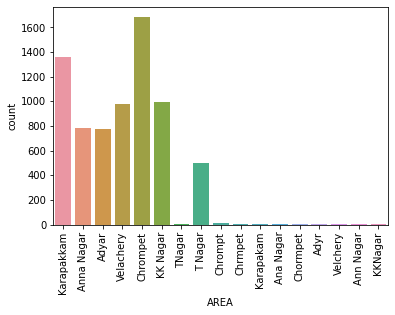

In [ ]:
plt.xticks(rotation=90)
sns.countplot(df['AREA'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


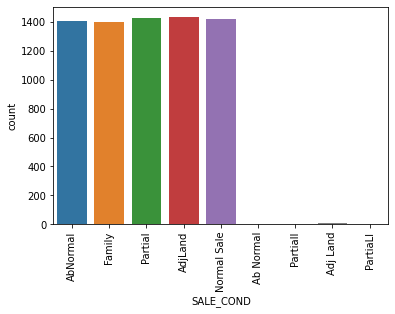

In [ ]:
plt.xticks(rotation=90)
sns.countplot(df['SALE_COND'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


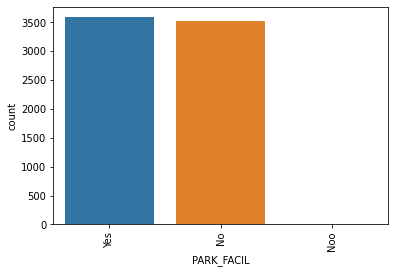

In [ ]:
plt.xticks(rotation=90)
sns.countplot(df['PARK_FACIL'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


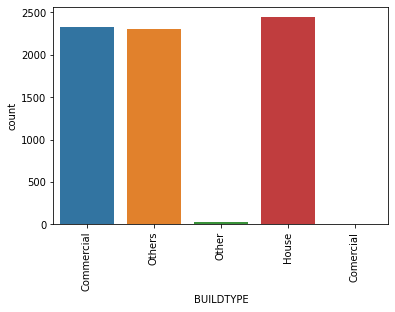

In [ ]:
plt.xticks(rotation=90)
sns.countplot(df['BUILDTYPE'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


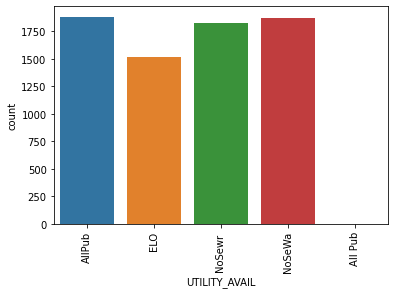

In [ ]:
plt.xticks(rotation=90)
sns.countplot(df['UTILITY_AVAIL'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


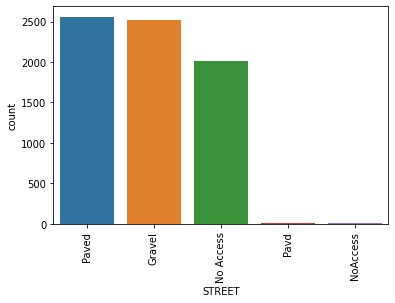

In [ ]:
plt.xticks(rotation=90)
sns.countplot(df['STREET'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


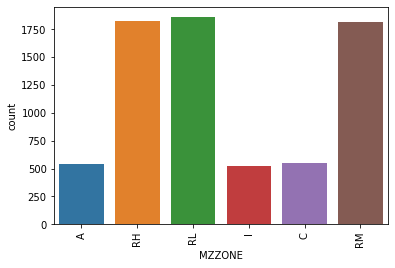

In [ ]:
plt.xticks(rotation=90)
sns.countplot(df['MZZONE'])
plt.show()

In [ ]:
df['AREA'] = df['AREA'].replace({'Karapakam':'Karapakkam','Chrmpet':'Chrompet','Chormpet':'Chrompet','Chrompt':'Chrompet','Ana Nagar':'Anna Nagar','TNagar':'T Nagar',
                                 'Adyr':'Adyar','Velchery':'Velachery','Ann Nagar':'Anna Nagar','KKNagar':'KK Nagar'})
df['SALE_COND'] = df['SALE_COND'].replace({'Ab Normal':'AbNormal','Partiall':'Partial','Adj Land':'AdjLand','PartiaLl':'Partial'})
df['PARK_FACIL'] = df['PARK_FACIL'].replace({'Noo':'No'})
df['BUILDTYPE'] = df['BUILDTYPE'].replace({'Comercial':'Commercial','Other':'Others'})
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({'All Pub':'AllPub','NoSewr':'NoSeWa', 'NoSewr ':'NoSeWa'})
df['STREET'] = df['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'})

In [ ]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [ ]:
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSeWa'], dtype=object)

In [ ]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

##Linear reg to find QS_OVERALL

In [ ]:
df_temp = df[['QS_ROOMS','QS_BEDROOM','QS_BATHROOM','QS_OVERALL']]
df_temp.dropna(inplace=True)

In [ ]:
df_temp.shape

(7061, 4)

In [ ]:
#Creating a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = df_temp[['QS_ROOMS','QS_BEDROOM','QS_BATHROOM']].values
Y = df_temp['QS_OVERALL'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)
print("Intercept:{} ,Coefficients:{}".format(model.intercept_, model.coef_))
print(model.score(X,Y))

Intercept:[-0.00255759] ,Coefficients:[[0.29955281 0.37606744 0.3256483 ]]
0.9668940978470704


In [ ]:
model.predict([[4,3.9,4.9]])

array([[4.25799333]])

In [ ]:
model.predict([[4.9,4.2,2.5]])

array([[3.85885518]])

##Checking for outliers


In [ ]:
#df.to_csv('cleaned_chennai_final.csv')

In [2]:
df = pd.read_csv('cleaned_chennai_final.csv',usecols=range(1,23))

In [7]:
df.head()

AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  Karapakkam      1004  2011-04-05            131          1           1   
1  Anna Nagar      1986  2006-12-19             26          2           1   
2       Adyar       909  2012-04-02             70          1           1   
3   Velachery      1855  2010-03-13             14          3           2   
4  Karapakkam      1226  2009-05-10             84          1           1   

   N_ROOM SALE_COND PARK_FACIL  DATE_BUILD  ...  STREET MZZONE QS_ROOMS  \
0       3  AbNormal        Yes  1967-05-15  ...   Paved      A      4.0   
1       5  AbNormal         No  1995-12-22  ...  Gravel     RH      4.9   
2       3  AbNormal        Yes  1992-09-02  ...  Gravel     RL      4.1   
3       5    Family         No  1988-03-18  ...   Paved      I      4.7   
4       3  AbNormal        Yes  1979-10-13  ...  Gravel      C      3.0   

  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  \
0         3.9         4.9       4.330   380000  144400      7600000   
1         4.2         2.5       3.765   760122  304049     21717770   
2         3.8         2.2       3.090   421094   92114     13159200   
3         3.9         3.6       4.010   356321   77042      9630290   
4         2.5         4.1       3.290   237000   74063      7406250   

   BUILDING_AGE  
0            43  
1            10  
2            19  
3            21  
4            29  

[5 rows x 22 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


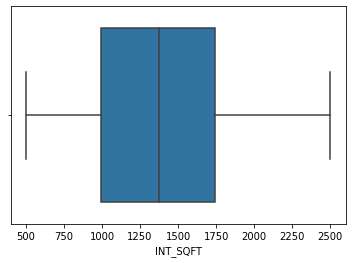

In [ ]:
sns.boxplot(df['INT_SQFT']) # No outliers present

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


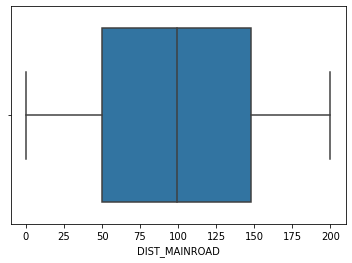

In [ ]:
sns.boxplot(df['DIST_MAINROAD']) # No outliers present

##EDA

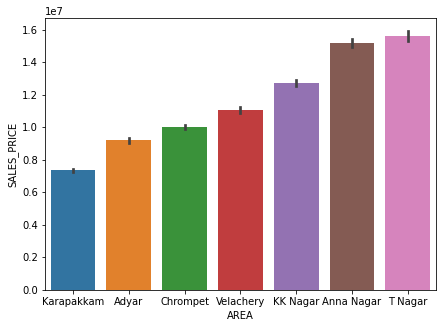

In [ ]:
area_order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
fig = plt.figure(figsize = (7,5))
sns.barplot(x='AREA', y='SALES_PRICE', data=df,order= area_order)
plt.show()

We can see that area is positively linearly related to sales price.For different areas, the mean sales price is different. We will do label encoding for the same at the time of model building.

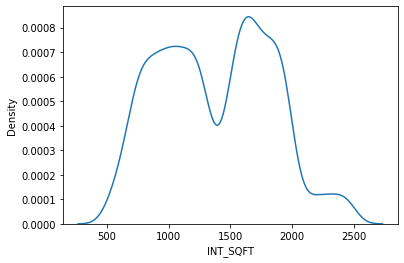

In [ ]:
sns.kdeplot(df['INT_SQFT'])

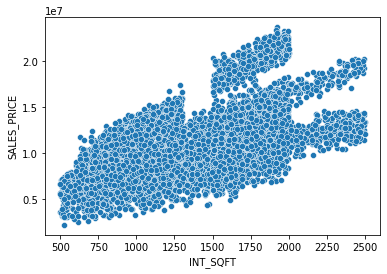

In [ ]:
sns.scatterplot(x='INT_SQFT',y ='SALES_PRICE', data=df) #Shows the sqft is positively related to the sale price

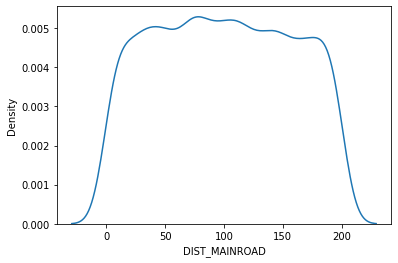

In [ ]:
sns.kdeplot(df['DIST_MAINROAD'])

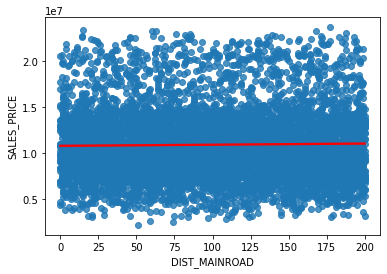

In [ ]:
sns.regplot(x='DIST_MAINROAD',y ='SALES_PRICE', data=df, line_kws={"color": "red"})

Here we can't see any relationship with sales_price.So we may not use it further 

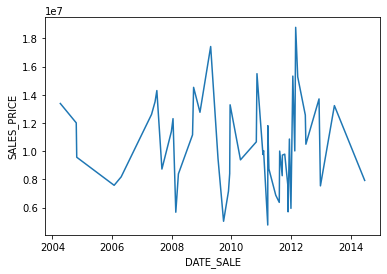

In [ ]:
sns.lineplot(x='DATE_SALE',y ='SALES_PRICE', data=df.sample(50))

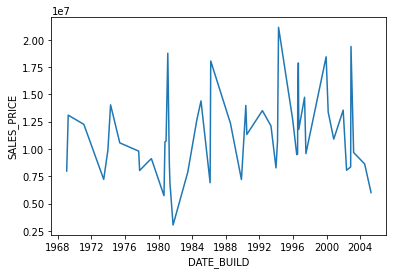

In [ ]:
sns.lineplot(x='DATE_BUILD',y ='SALES_PRICE', data=df.sample(50))

Here I wanted to check if inflation would effect the sales price.But we can't find any clear trend in sale price in relation to date_sale or date_build. Also we have a derived column 'BUILDING_AGE' from these two columns.So we will not use these date columns further.

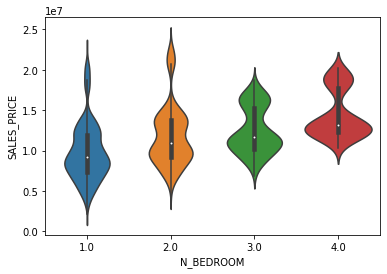

In [ ]:
sns.violinplot(x='N_BEDROOM', y ='SALES_PRICE', data=df)
#We can see a upwards shift in the median and distribution of sales price with increase in the no.of bedrooms

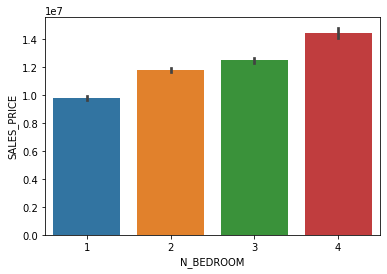

In [ ]:
sns.barplot(x='N_BEDROOM', y ='SALES_PRICE', data=df)

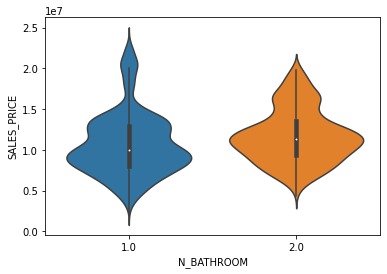

In [ ]:
sns.violinplot(x='N_BATHROOM', y ='SALES_PRICE', data=df)

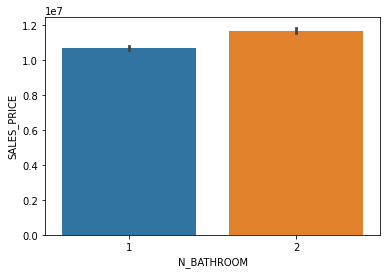

In [ ]:
sns.barplot(x='N_BATHROOM', y ='SALES_PRICE', data=df)#There is an increase in mean sale price with the increase in no.of bathrooms

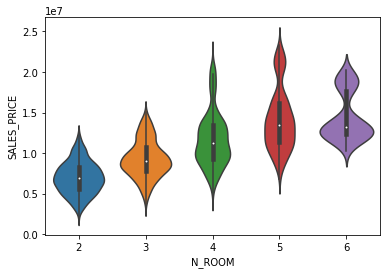

In [ ]:
sns.violinplot(x='N_ROOM', y ='SALES_PRICE', data=df)
#We can see a clear upwards shift in the median and distribution of sales price with increase in the no.of rooms

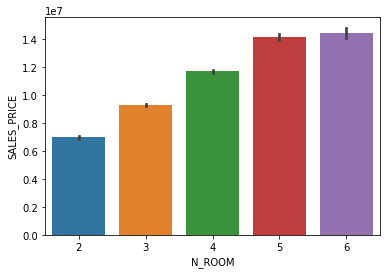

In [ ]:
sns.barplot(x='N_ROOM', y ='SALES_PRICE', data=df)

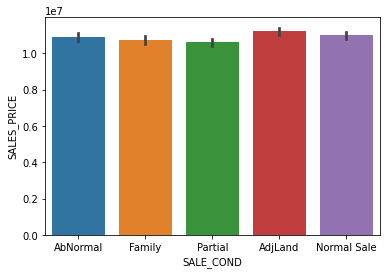

In [ ]:
sns.barplot(x='SALE_COND', y ='SALES_PRICE', data=df)
#Sale_cond doesn't seem to have an effect on sale price

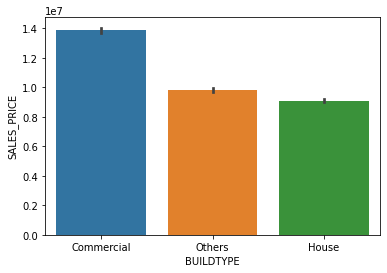

In [ ]:
sns.barplot(x='BUILDTYPE', y ='SALES_PRICE', data=df)
#there is a relation btw buildtype and sale price , but it is not linear. So we will do one hot encoding to this column

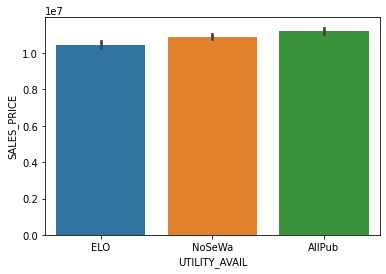

In [ ]:
_order = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
sns.barplot(x='UTILITY_AVAIL', y ='SALES_PRICE', data=df, order=_order)#there is a slight linear relation btw UTILITY_AVAIL and SALES_PRICE

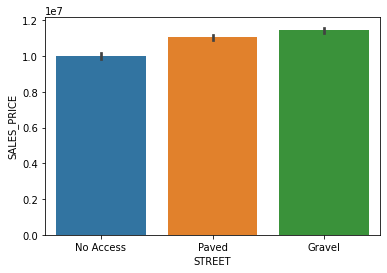

In [ ]:
_order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
sns.barplot(x='STREET', y ='SALES_PRICE', data=df, order=_order)
#we can find a linear relation with the sales price

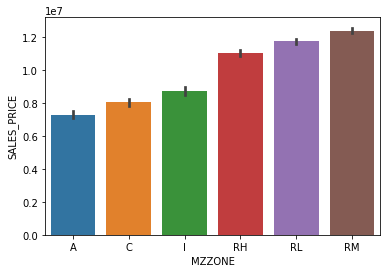

In [ ]:
_order = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
sns.barplot(x='MZZONE', y ='SALES_PRICE', data=df, order=_order)
#Piece-wise linear

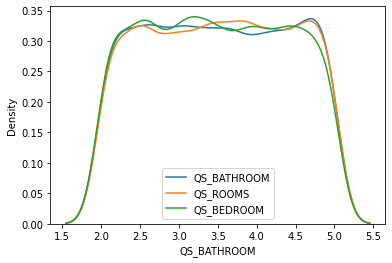

In [ ]:
sns.kdeplot(df['QS_BATHROOM'],label='QS_BATHROOM')
sns.kdeplot(df['QS_ROOMS'],label= 'QS_ROOMS')
sns.kdeplot(df['QS_BEDROOM'],label='QS_BEDROOM')
plt.legend()
plt.show()

In [ ]:
df[['QS_BATHROOM','QS_ROOMS','QS_BEDROOM']].describe()

QS_BATHROOM     QS_ROOMS   QS_BEDROOM
count  7109.000000  7109.000000  7109.000000
mean      3.507244     3.517471     3.485300
std       0.897834     0.891972     0.887266
min       2.000000     2.000000     2.000000
25%       2.700000     2.700000     2.700000
50%       3.500000     3.500000     3.500000
75%       4.300000     4.300000     4.300000
max       5.000000     5.000000     5.000000

From the above summary statistics, I have noticed:
QS_ROOMS, QS_BATHROOM, QS_BEDROOM fields have same min,max,q1,q2 and q3 and they have similar means. They looks like redundant.Let's check their relation to sales price

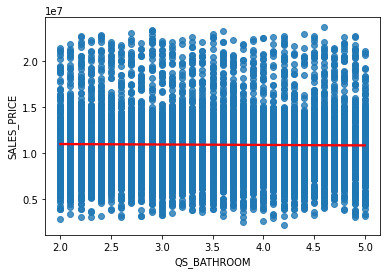

In [ ]:
sns.regplot(x='QS_BATHROOM',y ='SALES_PRICE',data=df,line_kws={"color": "red"})

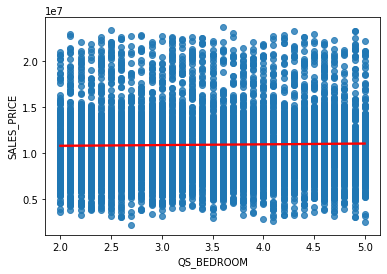

In [ ]:
sns.regplot(x='QS_BEDROOM',y ='SALES_PRICE',data=df,line_kws={"color": "red"})

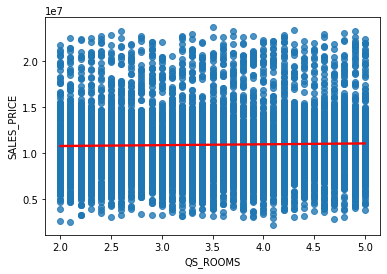

In [ ]:
sns.regplot(x='QS_ROOMS',y ='SALES_PRICE',data=df,line_kws={"color": "red"})

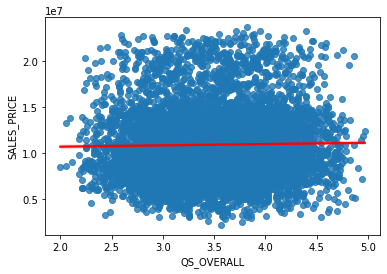

In [ ]:
sns.regplot(x='QS_OVERALL',y ='SALES_PRICE',data=df,line_kws={"color": "red"})

These columns doesn't seem to be a distinctive feature that determines sales price

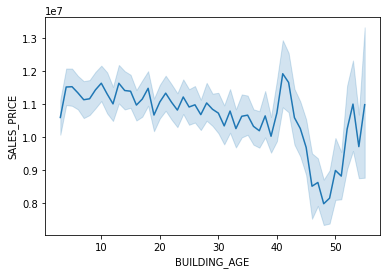

In [ ]:
sns.lineplot(x='BUILDING_AGE',y ='SALES_PRICE', data=df) #Sales price is seen to decrease with increase in age.

Now that we have seen all the columns individually, let us see if we can get some insights with any combination of columns

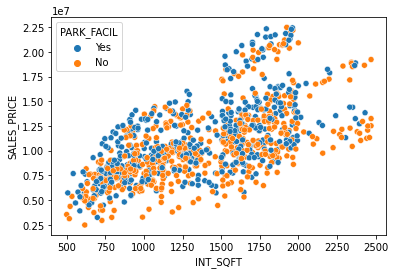

In [ ]:
sns.scatterplot(x='INT_SQFT',y ='SALES_PRICE', hue='PARK_FACIL' ,data=df.sample(1000)) 
#There isn't a clear distinction in sale price just because of parking facility

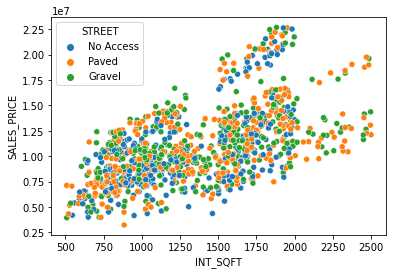

In [ ]:
sns.scatterplot(x='INT_SQFT',y ='SALES_PRICE', hue='STREET' ,data=df.sample(1000))
#There isn't a clear distinction in sale price just because of type of street

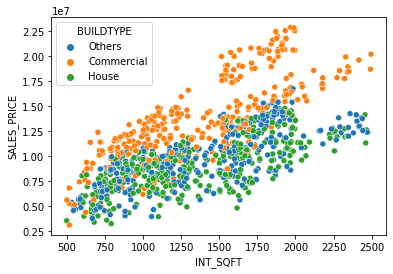

In [ ]:
sns.scatterplot(x='INT_SQFT',y ='SALES_PRICE', hue='BUILDTYPE' ,data=df.sample(1000))
#Sales price for 'Commercial' buildtype is comparatively higher than the other two for any size of building

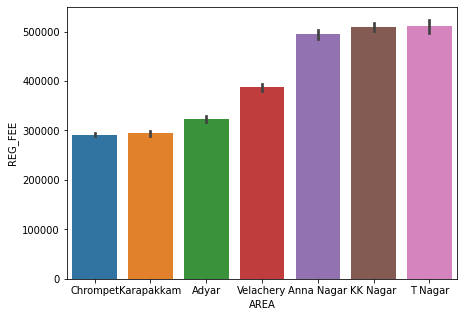

In [38]:
area_order = df.groupby('AREA')['REG_FEE'].mean().reset_index().sort_values('REG_FEE')['AREA']
fig = plt.figure(figsize = (7,5))
sns.barplot(x='AREA', y='REG_FEE', data=df,order= area_order)
plt.show()
#Reg fee changes with respect to area.But this is in sync with the sale price change with respect to area.
#As Reg fee is derived/calculated on sales price this makes sense.

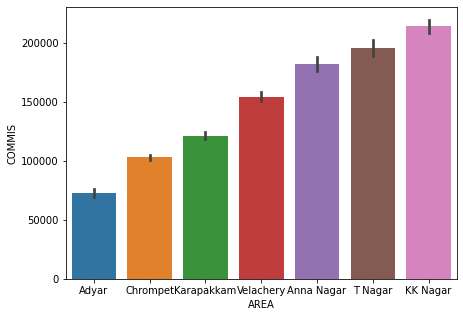

In [39]:
area_order = df.groupby('AREA')['COMMIS'].mean().reset_index().sort_values('COMMIS')['AREA']
fig = plt.figure(figsize = (7,5))
sns.barplot(x='AREA', y='COMMIS', data=df,order= area_order)
plt.show()
#Commision changes with respect to area.But this is not in sync with the sale price change with respect to area.

In [8]:
#Lets add a column that describes what % of sales price is given as commision
df['COMMIS_%'] = (df['COMMIS']/df['SALES_PRICE'])*100

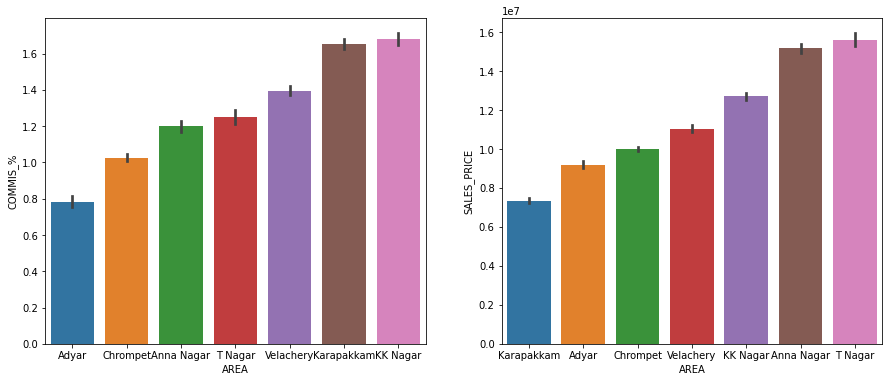

In [18]:
area_order1 = df.groupby('AREA')['COMMIS_%'].mean().reset_index().sort_values('COMMIS_%')['AREA']
area_order2 = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.barplot(x='AREA', y='COMMIS_%', data=df,order= area_order1)
plt.subplot(1,2,2)
sns.barplot(x='AREA', y='SALES_PRICE', data=df,order= area_order2)

The above graph shows the % of amount levied as commision in each area followed by sales_price in each area.An important info that we can note here is that though Karappakkam mean sales price is at the lower end, its commision is quite higher.Also the mean sales price of TNagar and Anna Nagar are the highest but their commision is comparatively less.

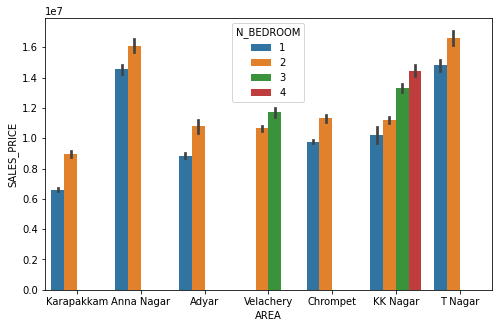

In [48]:
fig = plt.figure(figsize=(8,5))
sns.barplot(x='AREA',y='SALES_PRICE' ,data=df, hue='N_BEDROOM')
plt.show()


*   From the above graph we can see that KKNagar is the only area with 4 bedroom properties and Velachery and KKNagar are the only areas with 3 bedroom properties.From this may be we can say that Velachery and KKNagar is mostly preferred for large/premium properties.
*   Also, though TNagar and Anna Nagar have transacted only 1 and 2 BHK, their mean sales price stays the highest and even higher than 3 and 4BHK in KKNagar and Velachery



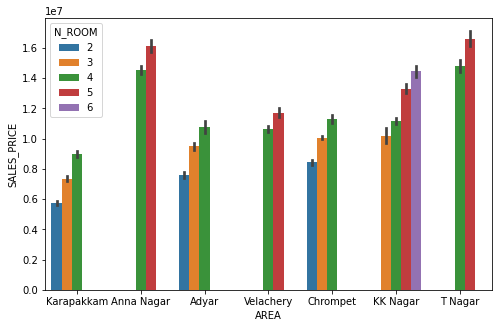

In [50]:
fig = plt.figure(figsize=(8,5))
sns.barplot(x='AREA',y='SALES_PRICE' ,data=df, hue='N_ROOM')
plt.show()



*   KKNagar is the only area with 6 rooms
*   Although we found that TNagar and AnnaNagar have only 1 and 2 BHKs , all properties have 4 or 5 rooms and not less than that.



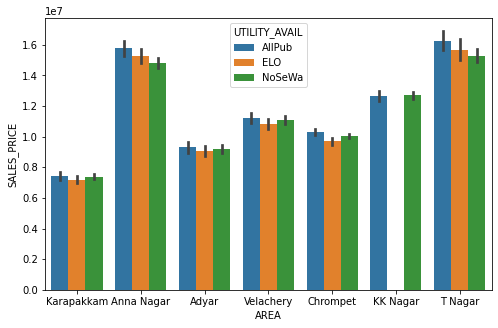

In [51]:
fig = plt.figure(figsize=(8,5))
sns.barplot(x='AREA',y='SALES_PRICE' ,data=df, hue='UTILITY_AVAIL')
plt.show()

Mostly we can find the same order in areawise AllPub > NoSewa > ELO as we have seen individually with UTILITY_AVAIL

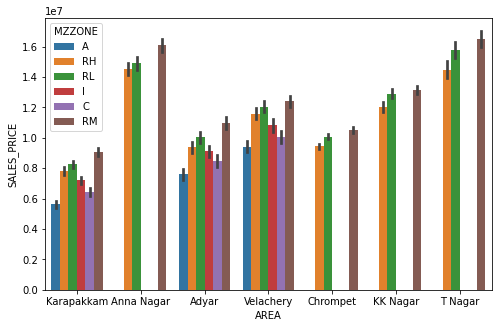

In [52]:
fig = plt.figure(figsize=(8,5))
sns.barplot(x='AREA',y='SALES_PRICE' ,data=df, hue='MZZONE')
plt.show()

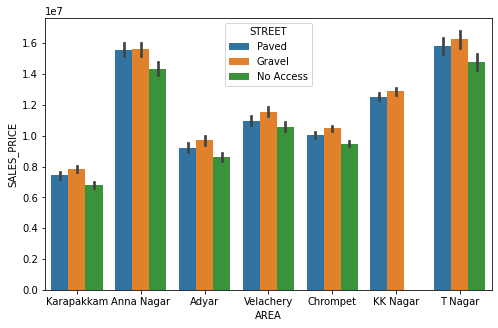

In [53]:
fig = plt.figure(figsize=(8,5))
sns.barplot(x='AREA',y='SALES_PRICE' ,data=df, hue='STREET')
plt.show()

Mostly we can find the same order in areawise Gravel > Paved > No acess as we have seen individually with STREET

In [ ]:
df.groupby('PARK_FACIL')['SALES_PRICE'].median() # Exact values shows a difference of Rs.9lakh in sales price with/without parking facility

PARK_FACIL
No      9815165.0
Yes    10768375.0
Name: SALES_PRICE, dtype: float64

Let's see some composition of data now

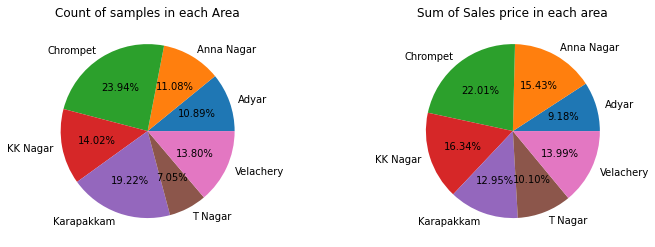

In [30]:
plt.figure(figsize = (12,4))
c = df.groupby('AREA')['AREA'].count()
plt.subplot(1,2,1)
plt.pie(c, labels=c.index, autopct="%.2f%%");
plt.title("Count of samples in each Area")
plt.subplot(1,2,2)
c = df.groupby('AREA')['SALES_PRICE'].sum()
plt.pie(c, labels=c.index, autopct="%.2f%%");
plt.title("Sum of Sales price in each area")
plt.show()

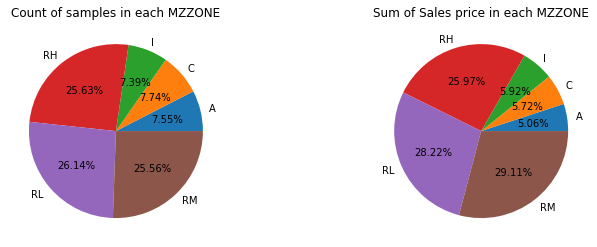

In [31]:
plt.figure(figsize = (12,4))
c = df.groupby('MZZONE')['MZZONE'].count()
plt.subplot(1,2,1)
plt.pie(c, labels=c.index, autopct="%.2f%%");
plt.title("Count of samples in each MZZONE")
plt.subplot(1,2,2)
c = df.groupby('MZZONE')['SALES_PRICE'].sum()
plt.pie(c, labels=c.index, autopct="%.2f%%");
plt.title("Sum of Sales price in each MZZONE")
plt.show()

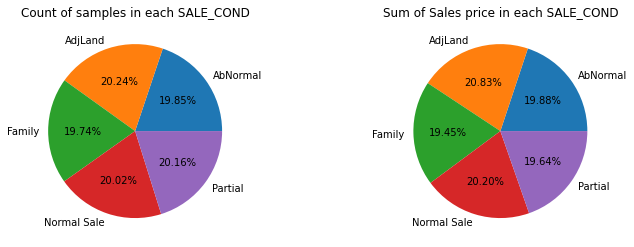

In [29]:
plt.figure(figsize = (12,4))
c = df.groupby('SALE_COND')['SALE_COND'].count()
plt.subplot(1,2,1)
plt.pie(c, labels=c.index, autopct="%.2f%%");
plt.title("Count of samples in each SALE_COND")
plt.subplot(1,2,2)
c = df.groupby('SALE_COND')['SALES_PRICE'].sum()
plt.pie(c, labels=c.index, autopct="%.2f%%");
plt.title("Sum of Sales price in each SALE_COND")
plt.show()

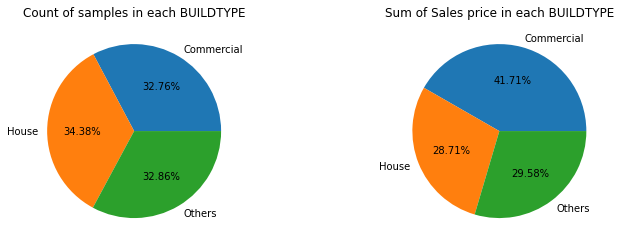

In [32]:
plt.figure(figsize = (12,4))
c = df.groupby('BUILDTYPE')['SALES_PRICE'].count()
plt.subplot(1,2,1)
plt.pie(c, labels=c.index, autopct="%.2f%%");
plt.title("Count of samples in each BUILDTYPE")
plt.subplot(1,2,2)
c = df.groupby('BUILDTYPE')['SALES_PRICE'].sum()
plt.pie(c, labels=c.index, autopct="%.2f%%");
plt.title("Sum of Sales price in each BUILDTYPE")
plt.show()

In [3]:
df.drop(['DATE_SALE','SALE_COND','DIST_MAINROAD', 'DATE_BUILD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS','COMMIS_%'], axis=1, inplace=True)

In [4]:
df.head()

AREA  INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM PARK_FACIL   BUILDTYPE  \
0  Karapakkam      1004          1           1       3        Yes  Commercial   
1  Anna Nagar      1986          2           1       5         No  Commercial   
2       Adyar       909          1           1       3        Yes  Commercial   
3   Velachery      1855          3           2       5         No      Others   
4  Karapakkam      1226          1           1       3        Yes      Others   

  UTILITY_AVAIL  STREET MZZONE  SALES_PRICE  BUILDING_AGE  
0        AllPub   Paved      A      7600000            43  
1        AllPub  Gravel     RH     21717770            10  
2           ELO  Gravel     RL     13159200            19  
3        NoSeWa   Paved      I      9630290            21  
4        AllPub  Gravel      C      7406250            29

In [5]:
#df.to_csv('cleaned_chennai_b4encoding.csv')

In [6]:
df1 = df.copy()

In [7]:
#Label encoding for categorical columns
df1['AREA'] = df1['AREA'].map({'Karapakkam':0, 'Adyar':1, 'Chrompet':2, 'Velachery':3, 'KK Nagar':4, 'Anna Nagar': 5, 'T Nagar':6})
df1['UTILITY_AVAIL'] = df1['UTILITY_AVAIL'].map({'ELO':0, 'NoSeWa':1, 'AllPub':2})
df1['STREET'] = df1['STREET'].map({'No Access':0, 'Paved':1, 'Gravel':2 })
df1['MZZONE'] = df1['MZZONE'].map({'A':0, 'C':1, 'I':2, 'RH':4, 'RL':5, 'RM':6})
df1['PARK_FACIL'] = df1['PARK_FACIL'].map({'Yes':1, 'No':0})

In [8]:
#One-hot encoding for BUILDTYPE
df1 = pd.get_dummies(df1, columns = ['BUILDTYPE'])

In [9]:
df1.head()

AREA  INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM  PARK_FACIL  UTILITY_AVAIL  \
0     0      1004          1           1       3           1              2   
1     5      1986          2           1       5           0              2   
2     1       909          1           1       3           1              0   
3     3      1855          3           2       5           0              1   
4     0      1226          1           1       3           1              2   

   STREET  MZZONE  SALES_PRICE  BUILDING_AGE  BUILDTYPE_Commercial  \
0       1       0      7600000            43                     1   
1       2       4     21717770            10                     1   
2       2       5     13159200            19                     1   
3       1       2      9630290            21                     0   
4       2       1      7406250            29                     0   

   BUILDTYPE_House  BUILDTYPE_Others  
0                0                 0  
1                0                 0  
2                0                 0  
3                0                 1  
4                0                 1

#Model Building and Evaluation

##Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
#df1 = pd.read_csv('cleaned_chennai_encoded.csv',usecols=range(1,15))

In [3]:
df1.head()

AREA  INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM  PARK_FACIL  UTILITY_AVAIL  \
0     0      1004          1           1       3           1              2   
1     5      1986          2           1       5           0              2   
2     1       909          1           1       3           1              0   
3     3      1855          3           2       5           0              1   
4     0      1226          1           1       3           1              2   

   STREET  MZZONE  SALES_PRICE  BUILDING_AGE  BUILDTYPE_Commercial  \
0       1       0      7600000            43                     1   
1       2       4     21717770            10                     1   
2       2       5     13159200            19                     1   
3       1       2      9630290            21                     0   
4       2       1      7406250            29                     0   

   BUILDTYPE_House  BUILDTYPE_Others  
0                0                 0  
1                0                 0  
2                0                 0  
3                0                 1  
4                0                 1

In [4]:
input_cols = ['AREA', 'INT_SQFT','N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'BUILDING_AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others']

In [7]:
X = df1[input_cols].values
Y = df1['SALES_PRICE'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(5687, 13) (1422, 13) (5687, 1) (1422, 1)


In [8]:
func2 = StandardScaler()
func2.fit(X_train)
X_train_stand = func2.transform(X_train) 
X_test_stand = func2.transform(X_test) 

In [9]:
model2 = LinearRegression()
model2.fit(X_train_stand,Y_train)
print("Intercept:{} ,Coefficients:{}".format(model2.intercept_, model2.coef_))
print(model2.score(X_train_stand,Y_train))
print(model2.score(X_test_stand,Y_test))

Intercept:[10925361.34253561] ,Coefficients:[[ 1045811.88107401   669775.57607739 -1277186.70599311   115837.81058289
   1762443.2645216    525028.79883958    43321.7589708    401595.75326792
    868540.70636637  -211276.08446314  1352455.2758761   -846682.26226601
   -501631.05763239]]
0.9180807074550129
0.921366218977231


In [ ]:
mean_absolute_error(Y_test, model2.predict(X_test_stand))

797634.051534244

In [ ]:
#Function to get all combinations of input columns
import itertools as it
def input_combos(cols):
    return [it.combinations(cols, n+1) for n in range(len(cols))]

In [ ]:
combos = input_combos(input_cols)

In [ ]:
#Creating a model for each combination and returning the r2 scores
def combo_r2scores( all_combos,df):
    combo_scores = {}
    for i in range(len(list(all_combos))):
        for j in list(all_combos[i]):
            X = df1[list(j)]
            Y = df1['SALES_PRICE']
            model = LinearRegression().fit(X,Y)
            combo_scores[model.score(X,Y)] = j
    return combo_scores

In [ ]:
output_dict = combo_r2scores(combos,df1)

In [ ]:
from collections import OrderedDict
dict1 = OrderedDict(sorted(output_dict.items()))
print(dict1)

OrderedDict([(0.0045086614888854015, ('UTILITY_AVAIL',)), (0.011844923910743432, ('N_BATHROOM',)), (0.014206666732782258, ('BUILDING_AGE',)), (0.01564444060601422, ('N_BATHROOM', 'UTILITY_AVAIL')), (0.01807895564675066, ('UTILITY_AVAIL', 'BUILDING_AGE')), (0.021441201688822464, ('PARK_FACIL',)), (0.022376922698526425, ('STREET',)), (0.025546822220020693, ('N_BATHROOM', 'BUILDING_AGE')), (0.026147346578388908, ('UTILITY_AVAIL', 'STREET')), (0.026473463018771737, ('PARK_FACIL', 'UTILITY_AVAIL')), (0.02878621514130153, ('N_BATHROOM', 'UTILITY_AVAIL', 'BUILDING_AGE')), (0.03205551928006145, ('N_BATHROOM', 'STREET')), (0.03374005736795671, ('N_BATHROOM', 'PARK_FACIL')), (0.03522508420805148, ('STREET', 'BUILDING_AGE')), (0.03526778297792199, ('N_BATHROOM', 'UTILITY_AVAIL', 'STREET')), (0.035332216180599674, ('PARK_FACIL', 'BUILDING_AGE')), (0.03801295783453218, ('N_BATHROOM', 'PARK_FACIL', 'UTILITY_AVAIL')), (0.038461272191896656, ('UTILITY_AVAIL', 'STREET', 'BUILDING_AGE')), (0.03969477032

In [ ]:
max(output_dict)

0.9187818165026213

In [ ]:
output_dict[0.9187818165026213] # these combination of columns give the maximum r2 score

('AREA',
 'INT_SQFT',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'PARK_FACIL',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE',
 'BUILDING_AGE',
 'BUILDTYPE_Commercial',
 'BUILDTYPE_House',
 'BUILDTYPE_Others')

In [ ]:
#Calculating VIF to check for multi-collinearity
import statsmodels.api as sm
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

X=df1[input_cols]
calculate_vif(X)

Var    Vif
4                 N_ROOM  15.12
1               INT_SQFT  12.30
2              N_BEDROOM   5.93
0                   AREA   3.95
3             N_BATHROOM   3.21
8                 MZZONE   1.22
9           BUILDING_AGE   1.03
6          UTILITY_AVAIL   1.02
7                 STREET   1.02
5             PARK_FACIL   1.00
10         DIST_MAINROAD   1.00
12       BUILDTYPE_House   0.93
13      BUILDTYPE_Others   0.21
11  BUILDTYPE_Commercial   0.17

Summary
*   Here we have created a linear regression model. The train r2 score is 0.918 and test r2 score is 0.92
*   We have tried all combinations of input features and see that all columns together makes the highest accuracy.
*   Input Scaling: Tried Standardization and Normalization. Does not make a difference in the model score
*   Tried label encoding all the categorical columns, but BUILD_TYPE one-hot encoded gives better score.
*  From the heatmap we have already seen that INT_SQFT and N_ROOM are highly correlated.But avoiding any one column doesn't improve score in this case.
*   I have used Variable Inflation Factors(VIF) to detect the presence of multi-collinearity in the model.INT_SQFT and N_ROOM have high VIF value.But as removing them reduces the model score, I have retained both the features







In many cases, it is better to have a range of values rather than a exact number as an output. We will try to come up with some lower and upper price predictions

In [10]:
#using statsmodels package to get the prediction intervals
import statsmodels.api as sm
sm_model = sm.OLS(Y_train, sm.add_constant(X_train_stand)).fit()
sm_pred = sm_model.get_prediction(sm.add_constant(X_test_stand))\
                  .summary_frame(alpha=0.1)
sm_pred.head()

mean       mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  1.400372e+07  44083.653405   1.393120e+07   1.407624e+07  1.221643e+07   
1  1.317381e+07  51596.328841   1.308893e+07   1.325869e+07  1.138597e+07   
2  1.868758e+07  61251.732567   1.858681e+07   1.878834e+07  1.689891e+07   
3  4.006092e+06  48773.077840   3.925855e+06   4.086330e+06  2.218470e+06   
4  1.327245e+07  58513.766525   1.317618e+07   1.336871e+07  1.148403e+07   

   obs_ci_upper  
0  1.579101e+07  
1  1.496165e+07  
2  2.047624e+07  
3  5.793715e+06  
4  1.506086e+07

*   Here mean is same as the y_predicted,mean_ci_lower and mean_ci_upper are the confidence interval boundaries, obs_ci_lower and obs_ci_upper are the prediction interval boundaries.
*   This is a 90% prediction interval because we chose alpha=0.1

In [15]:
df_pred_intervals = pd.DataFrame(X_test,columns=input_cols)
df_y_test = pd.DataFrame(Y_test, columns=['SALES_PRICE'])

In [19]:
#We concatenate the test inputs, original target and the predicted intervals to get a whole view
df_pred_intervals = pd.concat([df_pred_intervals,df_y_test, sm_pred[['mean', 'obs_ci_lower', 'obs_ci_upper']]], axis=1)

In [21]:
df_pred_intervals.head()

AREA  INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM  PARK_FACIL  UTILITY_AVAIL  \
0     2      1029          1           1       3           1              0   
1     4      2006          3           2       5           1              2   
2     6      1579          1           1       4           1              2   
3     0       718          1           1       2           1              1   
4     2      1216          2           1       4           0              0   

   STREET  MZZONE  BUILDING_AGE  BUILDTYPE_Commercial  BUILDTYPE_House  \
0       2       5            29                     1                0   
1       1       5             6                     0                0   
2       2       5            43                     1                0   
3       0       1            24                     0                0   
4       2       5            34                     1                0   

   BUILDTYPE_Others  SALES_PRICE          mean  obs_ci_lower  obs_ci_upper  
0                 0     13376150  1.400372e+07  1.221643e+07  1.579101e+07  
1                 1     12857440  1.317381e+07  1.138597e+07  1.496165e+07  
2                 0     19124310  1.868758e+07  1.689891e+07  2.047624e+07  
3                 1      4905000  4.006092e+06  2.218470e+06  5.793715e+06  
4                 0     13534450  1.327245e+07  1.148403e+07  1.506086e+07

In [22]:
ols_correct = np.mean(df_pred_intervals['SALES_PRICE'].between(df_pred_intervals['obs_ci_lower'], df_pred_intervals['obs_ci_upper']))
print(f"{ols_correct:.2%} of the prediction intervals contain true target.")

92.05% of the prediction intervals contain true target.


*   This may be interpreted as we are 90% confident that the actual target value for a record will fall somewhere between lower and upper boundaries based on the input values.
*   In our case, we can see that 92% of the prediction intervals contain true target.

##KNN Regressor

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [24]:
input_cols = ['AREA', 'INT_SQFT', 'N_BEDROOM','N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'BUILDING_AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others']

In [25]:
X = df1[input_cols].values
Y = df1['SALES_PRICE'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(5687, 13) (1422, 13) (5687, 1) (1422, 1)


In [26]:
func1 = MinMaxScaler(feature_range = (0,1))
func1.fit(X_train)
X_train_norm = func1.transform(X_train)
X_test_norm = func1.transform(X_test)

func2 = StandardScaler()
func2.fit(X_train)
X_train_stand = func2.transform(X_train) 
X_test_stand = func2.transform(X_test) 

In [27]:
# Building models on standardized inputs
num_neighbors = [1,2,3,4,5,6,7,8,9,10]
r2_results = []
for num in num_neighbors:
    model = KNeighborsRegressor(n_neighbors=num).fit(X_train_stand, Y_train)
    r2_results.append(r2_score(Y_test, model.predict(X_test_stand)))

In [28]:
print(r2_results)
print(np.array(r2_results).argmax()) #with standardized inputs we get a max score of 0.955 with k=5

[0.939671973016444, 0.9528001753562825, 0.9542412261298637, 0.9545264471698827, 0.9553831134446504, 0.9546582805091902, 0.9549806757209719, 0.9538882566594985, 0.952721670692805, 0.9528527327882776]
4


In [29]:
# Building models on normalized inputs
num_neighbors = [1,2,3,4,5,6,7,8,9,10]
r2_results = []
for num in num_neighbors:
    model = KNeighborsRegressor(n_neighbors=num).fit(X_train_norm, Y_train)
    r2_results.append(r2_score(Y_test, model.predict(X_test_norm)))

In [30]:
print(r2_results)
print(np.array(r2_results).argmax())#with normalized inputs we get a max score of 0.951 with k=4

[0.9412780027959788, 0.9498842718249797, 0.9505618134151718, 0.9509622671386967, 0.94790715787539, 0.9458278682595018, 0.9427791619680637, 0.940080233071398, 0.9386071826382594, 0.936153184160994]
3


In [31]:
#We save the best model and find training and test scores
model = KNeighborsRegressor(n_neighbors=5).fit(X_train_stand, Y_train)
print("Train data r2 score with k=5 :",r2_score(Y_train, model.predict(X_train_stand)))
print("Test data r2 score with k=5 :",r2_score(Y_test, model.predict(X_test_stand)))

Train data r2 score with k=5 : 0.9705965401608361
Test data r2 score with k=5 : 0.9553831134446504


In [32]:
def combo_r2scores( all_combos,df):
    f = StandardScaler()
    combo_scores = {}
    for i in range(len(list(all_combos))):
        for j in list(all_combos[i]):
            X = f.fit_transform(df[list(j)])
            Y = df1['SALES_PRICE']
            model = KNeighborsRegressor(n_neighbors=5).fit(X, Y)
            combo_scores[model.score(X,Y)] = j
    return combo_scores

In [34]:
#Function to get all combinations of input columns
import itertools as it
def input_combos(cols):
    return [it.combinations(cols, n+1) for n in range(len(cols))]

In [35]:
combos = input_combos(input_cols)
output_dict = combo_r2scores(combos,df1)

In [36]:
max(output_dict)

0.9894180225132799

In [37]:
output_dict[0.9894180225132799]# we can see that with standardized inputs and k

('AREA',
 'INT_SQFT',
 'PARK_FACIL',
 'STREET',
 'MZZONE',
 'BUILDTYPE_Commercial',
 'BUILDTYPE_House',
 'BUILDTYPE_Others')

 We can see that with standardized inputs and k=5, the above combination of columns gives the maximum r2 score of 0.989

##DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
input_cols = ['AREA', 'INT_SQFT','N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'BUILDING_AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others']

In [ ]:
X = df1[input_cols].values
Y = df1['SALES_PRICE'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train,Y_train)
print(model.score(X_train,Y_train))
print(model.score(X_test,Y_test))

0.9770587292763475

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train_stand,Y_train)
print(model.score(X_train_stand,Y_train))
print(model.score(X_test_stand,Y_test))

0.9767466788437084

##RandomForest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
input_cols = ['AREA', 'INT_SQFT','N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'BUILDING_AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others']

In [ ]:
X = df1[input_cols].values
Y = df1['SALES_PRICE'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train,Y_train)
print(model.score(X_train,Y_train))
print(model.score(X_test,Y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9984097087511395
0.989376297436621


Text(0.5, 0, 'Random Forest Feature Importance')

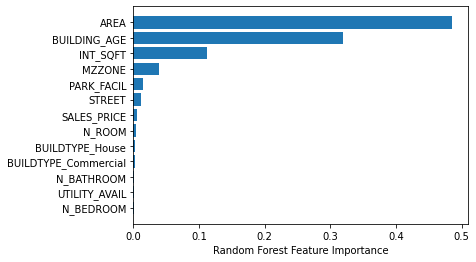

In [ ]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(df1.columns[sorted_idx],model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


*   According to the Random forest model, features AREA, BUILDING_AGE and INT_SQFT are the most important features
*   Standardization/Normalization of inputs doesn't affect the results of RandomForest Regressor/Decision Tree regression.
*   We get the maximum model score from Random Forest regressor and KNN regressor




#Some points for Sellers/Builders



1.   As we do not have information about the input cost for the builders like material cost,labour charges, resources transportation cost, land value etc we cannot make a comment on profitability.
2.   From the transactional sales data that we have, we can get some insights on demand and final sale price.
3.   Maximum transactions have been done on 1 and 2 BHK properties.It might
     suggest that mostly people prefer such buildings or it is easier to transact such buildings.
4.   For properties with more than 2000sqft area, 'Commercial' buildtype considerably attracts more sales price than 'Housing' and 'Others'.
5.   Velachery and KKNagar is mostly preferred for large/premium properties.
6.   T Nagar and Anna Nagar are highly demanded residential areas.Their mean sales price stays the highest and even higher than 3 and 4BHK in KKNagar and Velachery
7.  Karappakkam mean sales price is at the lower end, its commision is quite higher.Also the mean sales price of TNagar and Anna Nagar are the highest but  commision in those area is comparatively less.
8.   Properties in MZZONE RH,RL and RM attracts higher sale price that zones A,I and C
9.   Availability of parking attracts more sale price.Exact values shows a difference of Rs.9lakh in median sales price with/without parking facility





All the charts/graphs supporting the above is explained in detail in Exploratory Data Analysis section.